# Final Project: Online News Popularity

# Data Set: https://archive.ics.uci.edu/ml/machine-learning-databases/00332/

# Load Library

In [237]:
import os, struct
import matplotlib as plt
import numpy as np
import pandas as pd 
import random
from sklearn import decomposition 
import scipy.sparse as sparse
import scipy.stats as stats
import scipy.linalg as linalg
from sklearn import preprocessing
from array import array as pyarray
import numpy as np
import math 


# Load Data

In [238]:
data = pd.read_csv('C:/Users/fbeker/Desktop/notes/Final_Project/raw_data/OnlineNewsPopularity.csv', sep=',') 
#print(data.describe)

# Summarize Data

In [239]:
print(data.shape)
data.describe()

(39644, 61)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


# Convert Data Frame To An Array

In [240]:
data=np.array(data)

# Divide into Train (75%) and Test (25%) Set

In [241]:
random.seed(1001)
msk = np.random.rand(len(data)) < 0.75
train = data[msk]
test = data[~msk]

# Target Column (# of Shares)

In [242]:
T=np.array(train)[:,60] # aslinda 61.column u almis oluyorsun (index 0 dan basliyor)
print(np.median(T))
T=np.reshape(T,(len(T),1))
T.shape

1400.0


(29730, 1)

# Compute Principal Components

In [243]:
X=train[:,2:60].astype(float)
std=np.std(X,axis=0)
mean=np.mean(X,axis=0)
Z=(X-mean)
Z.shape

(29730, 58)

In [244]:
pca = decomposition.PCA(n_components=2)
pca.fit(Z)
P = pca.transform(Z)
C = np.cov(X_scaled, rowvar=False)
[λ, V] = np.linalg.eig(C)
λ = np.flipud(λ)
VT = np.flipud(np.transpose(V))
print(pca.explained_variance_ratio_)
P

[ 0.76111643  0.16342362]


array([[-791131.90600162,  -83680.72619832],
       [-790931.28416472,  -84250.41328461],
       [-790931.28960895,  -84250.4899609 ],
       ..., 
       [  97758.60595218,    8970.06840401],
       [  80094.13544956,   46355.74782423],
       [ 135682.91952436, -110890.18134637]])

# Defining Popular & Viral News

In [245]:
withlabels=np.concatenate((P, T), axis=1)
withlabels=pd.DataFrame(withlabels, columns=['pc1','pc2','shares'])

In [246]:
withlabels['labels'] = np.where(withlabels['shares']<=1400, 'popular', 'viral')

In [247]:
popular=withlabels[withlabels['labels']=='popular']
viral=withlabels[withlabels['labels']=='viral']
print(popular.shape,viral.shape)

(15088, 4) (14642, 4)


In [248]:
popular=popular.reset_index(drop=True)
viral=viral.reset_index(drop=True)

# Preperation for Plot

In [249]:
#range of popular 
minpopularpc1=np.amin(popular[[0]])
maxpopularpc1=np.amax(popular[[0]])
minpopularpc2=np.amin(popular[[1]])
maxpopularpc2=np.amax(popular[[1]])
print(minpopularpc1,maxpopularpc1,minpopularpc2,maxpopularpc2)

pc1   -791131.924905
dtype: float64 pc1    364686.187112
dtype: float64 pc2   -715163.042145
dtype: float64 pc2    189923.598002
dtype: float64


In [250]:
#range of viral 
minviralpc1=np.amin(viral[[0]])
maxviralpc1=np.amax(viral[[0]])
minviralpc2=np.amin(viral[[1]])
maxviralpc2=np.amax(viral[[1]])
print(minviralpc1,maxviralpc1,minviralpc2,maxviralpc2)

pc1   -791131.927092
dtype: float64 pc1    363359.875975
dtype: float64 pc2   -711507.483074
dtype: float64 pc2    189134.254833
dtype: float64


# Histogram for popular

In [251]:
Bin_popular=math.log(len(popular),2)+1
Bin_viral=math.log(len(viral),2)+1
print(Bin_popular,Bin_viral)
len(popular)

14.881113960675096 14.837825009196694


15088

In [252]:
H_popular = np.zeros((14,14))
for j in range(0,len(popular)):
    r=1+math.floor((14-1)*((popular['pc1'][j]-minpopularpc1))/(maxpopularpc1-minpopularpc1))
    c=1+math.floor((14-1)*((popular['pc2'][j]-minpopularpc2))/(maxpopularpc2-minpopularpc2))
    H_popular[r-1,c-1]=H_popular[r-1,c-1]+1
#print(H_popular)

In [253]:
np.savetxt('H_popular.txt', H_popular)

# Histogram for viral

In [254]:
H_viral = np.zeros((14,14))
for j in range(0,len(viral)):
    r=1+math.floor((14-1)*((viral['pc1'][j]-minviralpc1))/(maxviralpc1-minviralpc1))
    c=1+math.floor((14-1)*((viral['pc2'][j]-minviralpc2))/(maxviralpc2-minviralpc2))
    H_viral[r-1,c-1]=H_viral[r-1,c-1]+1
#print(H_viral)

In [255]:
np.savetxt('H_viral.txt', H_viral)

# PLOT 3D HISTOGRAM

# Popular

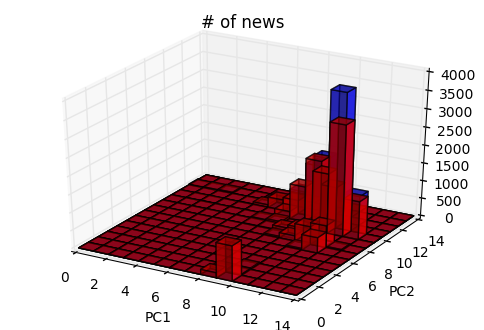

In [295]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have "2D" dataset like the following that you need to plot.
data_2d_popular = H_popular
data_2d_viral= H_viral

# Convert it into an numpy array.
data_array_popular = np.array(data_2d_popular)
data_array_viral = np.array(data_2d_viral)

# Create a figure for plotting the data as a 3D histogram.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create an X-Y mesh of the same dimension as the 2D data. You can think of this as the floor of the plot.

## 3D PLOT 

# POPULAR 
x_data, y_data = np.meshgrid( np.arange(data_array_popular.shape[1]),np.arange(data_array_popular.shape[0]))
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('# of news')
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array_popular.flatten()
ax.bar3d( x_data,y_data,np.zeros(len(z_data)),1, 1, z_data,color='b',alpha=0.60 )

# VIRAL
x_data, y_data = np.meshgrid( np.arange(data_array_viral.shape[1]),np.arange(data_array_viral.shape[0]))
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).

x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array_viral.flatten()
ax.bar3d( x_data,y_data,np.zeros(len(z_data)),1, 1, z_data,color='r',alpha=0.60 )
ax.view_init(ax.elev, ax.azim)
plt.show()
plt.close()

# Reconstructing  X Using 2 Principal Components

# R matrix

In [223]:
XRec=(np.dot(P,V[0:2,:])) #Reconstruction using 2 component
XRec.shape

(29703, 58)